In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import classificators

In [8]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

/usr/local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [9]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, y, test_size=0.9, train_size=0.1)
x_train, x_test, y_train, y_test = train_test_split(X_TEST, Y_TEST, test_size=0.15)
x_train_crossval, y_train_crossval = X_TRAIN, Y_TRAIN

print('CrossValidation size = ', x_train_crossval.shape[0])

print('Train set size = ', x_train.shape[0])
print('Test set size = ', x_test.shape[0])

CrossValidation size =  7000
Train set size =  53550
Test set size =  9450


In [4]:
def Test(dataset):
    print('\nLogisticRegression processing...')
    classificators.Logistic_Regression(*dataset)
    print('\nKNN processing...')
    classificators.KNN(*dataset)
    print('\nDesicionTree processing...')
    classificators.DesicionTree(*dataset)
    print('\nSVM processing...')
    classificators.SVM(*dataset)


LogisticRegression processing...
Best model params: 
Penalty: l2 | Tol: 0.1 | Solver: saga - > Accuracy = 0.8962857142857142
Accuracy:  0.920952380952381

KNN processing...
Best model params: 
Algorithm: ball_tree | P: 2 | N_neighbors: 3 - > Accuracy = 0.9378571428571428
Accuracy:  0.9743915343915344

DesicionTree processing...
Best model params: 
Criterion: entropy | Splitter: best | Max_depth: 10 - > Accuracy = 0.787
Accuracy:  0.8674074074074074

SVM processing...
Best model params: 
C: 5 | Kernel: rbf | Tol: 0.001 - > Accuracy = 0.956857142857143
Accuracy:  0.9847619047619047


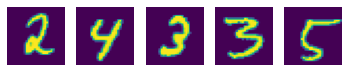

In [5]:
dataset = [x_train_crossval, y_train_crossval, x_train, y_train, x_test, y_test]

for i in range(5):
    plt.subplot(1,5,i+1)  
    plt.axis('off')
    plt.imshow(np.reshape(x_train[i], (28,28)))

Test(dataset)

In [ ]:
# l1 and l2 zero feature and show zero pixels

In [ ]:
# LogReg SGD numpy

In [ ]:
# Random Forest

In [10]:
from numpy import random as rnd

In [11]:
gen = rnd.RandomState(0)
x_train_noisy = np.clip(x_train + gen.random_sample(x_train.shape) * 5, 0, 255)

In [13]:
penalties = ['l1', 'l2']
logreg_classifiers = []
accuracies = []

for p in penalties:
    logreg_classifiers.append(LogisticRegression(penalty=p, max_iter=100, C=1e-2, n_jobs=-1, solver="saga"))
    logreg_classifiers[-1].fit(x_train_noisy, y_train)
    y_pred_ = logreg_classifiers[-1].predict(x_test)
    accuracies.append(accuracy_score(y_test, y_pred_))
    print(f"Accuracy of Logreg classifer with penalty={p}: {accuracies[-1]}")

/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy of Logreg classifer with penalty=l1: 0.9059259259259259
Accuracy of Logreg classifer with penalty=l2: 0.8966137566137566


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


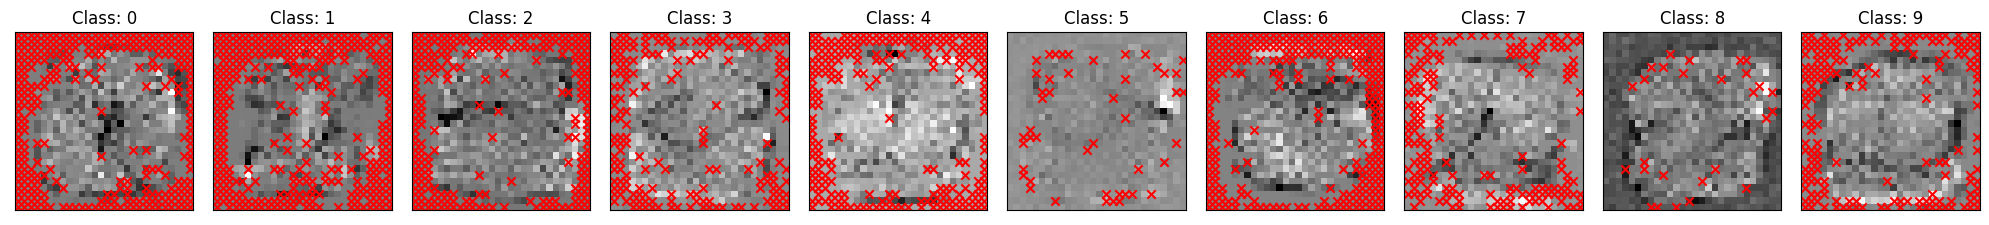

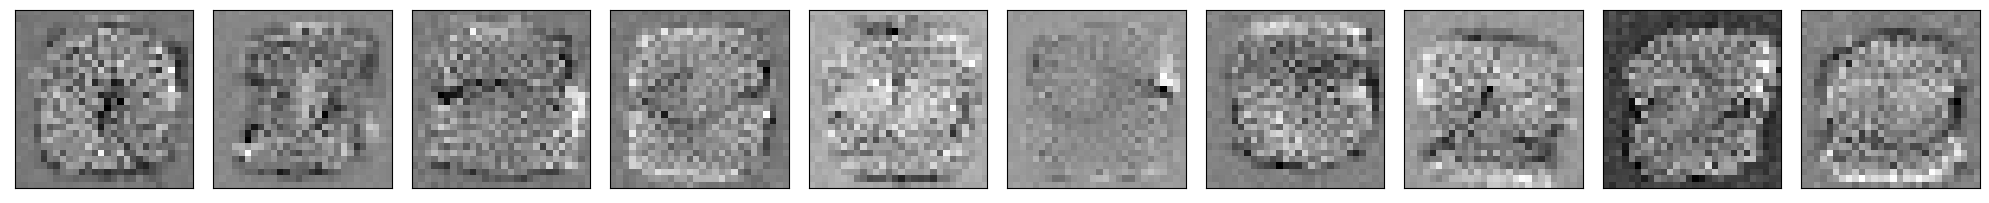

In [16]:
for j, classifier in enumerate(logreg_classifiers):
    coefs = classifier.coef_
    size = int(np.sqrt(coefs.shape[1]))
    images = coefs.reshape((coefs.shape[0], size, size))

    plt.figure(figsize=(20, 3), dpi=100)
    for i, img in enumerate(images):
        plt.subplot(1, images.shape[0], 1 + i)
        
        if j == 0:
            plt.title(f"Class: {i}")

        plt.imshow(img, cmap="gray")
        indices = np.nonzero(img == 0)
        if len(indices) > 0:
            plt.scatter(*indices, c='r', marker='x')
        plt.yticks([])
        plt.xticks([])
    plt.tight_layout()